In [13]:
import pandas as pd

# Load from local path or use Google Drive mount if in Colab
df = pd.read_csv("Downloads/CarPrice_Assignment.csv")  # Adjust path as needed
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Extract brand name
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Drop irrelevant columns
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = df.drop('price', axis=1).columns
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [17]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [20]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)


SVR()

In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

models = {
    "Linear Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "SVR": svr
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print(f"  R2 Score: {r2_score(y_test, y_pred):.4f}")
    print(f"  MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"  MAE: {mean_absolute_error(y_test, y_pred):.2f}\n")


Linear Regression:
  R2 Score: 0.9100
  MSE: 7104088.91
  MAE: 1817.88

Decision Tree:
  R2 Score: 0.8837
  MSE: 9178813.07
  MAE: 2070.19

Random Forest:
  R2 Score: 0.9575
  MSE: 3356433.35
  MAE: 1299.61

Gradient Boosting:
  R2 Score: 0.9286
  MSE: 5637845.07
  MAE: 1686.94

SVR:
  R2 Score: -0.1007
  MSE: 86891624.43
  MAE: 5701.78



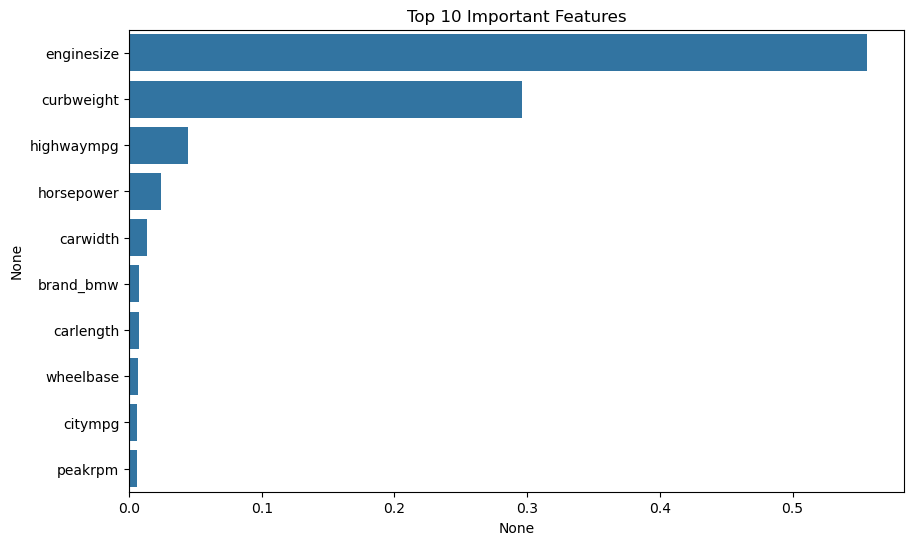

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# For tree-based models
importances = rf.feature_importances_
features = X.columns

# Plot feature importances
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Important Features")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Evaluate again
print("Tuned Random Forest R2:", r2_score(y_test, y_pred_best))
